In [67]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [69]:
import pandas as pd
import seaborn as sns

In [51]:
df1 = pd.read_csv("C:/Rwork/03/03_암발생자수.csv", encoding="cp949")
df1

,24개 암종별,성별,연령별,2019,2019.1
0,24개 암종별,성별,연령별,발생자수 (명),조발생률 (명/10만명)
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [52]:
# column명 수정
df1.columns = ['암종별','성별','연령별','발생자수','조발생률']
df1 = df1[(df1['암종별'] != '모든 암(C00-C96)') & (df1['암종별'] != '24개 암종별') & (df1['연령별'] != '계')]
df1

,암종별,성별,연령별,발생자수,조발생률
62,"입술, 구강 및 인두(C00-C14)",계,0-4세,-,-
63,"입술, 구강 및 인두(C00-C14)",계,5-9세,1,-
64,"입술, 구강 및 인두(C00-C14)",계,10-14세,7,0.3
65,"입술, 구강 및 인두(C00-C14)",계,15-19세,13,0.5
66,"입술, 구강 및 인두(C00-C14)",계,20-24세,32,1.0
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [53]:
# 특정 행, 열 조회
print(df1.index)
print(df1.columns)
print(df1.loc[62, '암종별'])
print(df1.iloc[0, 0])

Int64Index([  62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
            ...
            1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500],
           dtype='int64', length=1368)
Index(['암종별', '성별', '연령별', '발생자수', '조발생률'], dtype='object')
입술, 구강 및 인두(C00-C14)
입술, 구강 및 인두(C00-C14)


In [54]:
# 특정 행, 열 자료 추출
df1.loc[62:64, '암종별']

62    입술, 구강 및 인두(C00-C14)
63    입술, 구강 및 인두(C00-C14)
64    입술, 구강 및 인두(C00-C14)
Name: 암종별, dtype: object

In [55]:
import numpy as np

In [56]:
# df1['발생자수'] = np.where(df1['발생자수'] == '-', 0, df1['발생자수'])
# df1['조발생률'] = np.where(df1['조발생률'] == '-', 0, df1['조발생률'])

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 62 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1368 non-null   object
 1   성별      1368 non-null   object
 2   연령별     1368 non-null   object
 3   발생자수    1368 non-null   object
 4   조발생률    1368 non-null   object
dtypes: object(5)
memory usage: 96.4+ KB


In [58]:
# 데이터타입 변경
# df1['발생자수'] = df1['발생자수'].astype('int')
# df1.info()

In [59]:
# 데이터타입 변경2
# df1['조발생률'] = pd.to_numeric(df1['조발생률'])
# df1.info()

In [61]:
# 데이터타입 변경 함수
def typeChange(col, df):
  temp = list(df[col])
  temp = [float(s.replace('-', '0')) for s in temp]
  df[col] = temp
df1.info()
typeChange('발생자수', df1)
typeChange('조발생률', df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 62 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1368 non-null   object
 1   성별      1368 non-null   object
 2   연령별     1368 non-null   object
 3   발생자수    1368 non-null   object
 4   조발생률    1368 non-null   object
dtypes: object(5)
memory usage: 96.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 62 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1368 non-null   object 
 1   성별      1368 non-null   object 
 2   연령별     1368 non-null   object 
 3   발생자수    1368 non-null   float64
 4   조발생률    1368 non-null   float64
dtypes: float64(2), object(3)
memory usage: 96.4+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_16624\17881221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = temp


In [62]:
df1.head()

,암종별,성별,연령별,발생자수,조발생률
62,"입술, 구강 및 인두(C00-C14)",계,0-4세,0.0,0.0
63,"입술, 구강 및 인두(C00-C14)",계,5-9세,1.0,0.0
64,"입술, 구강 및 인두(C00-C14)",계,10-14세,7.0,0.3
65,"입술, 구강 및 인두(C00-C14)",계,15-19세,13.0,0.5
66,"입술, 구강 및 인두(C00-C14)",계,20-24세,32.0,1.0


In [65]:
# 성별 : 계
df2 = df1[(df1['성별'] == '계') & (df1['암종별'] == '입술, 구강 및 인두(C00-C14)')]
df2

,암종별,성별,연령별,발생자수,조발생률
62,"입술, 구강 및 인두(C00-C14)",계,0-4세,0.0,0.0
63,"입술, 구강 및 인두(C00-C14)",계,5-9세,1.0,0.0
64,"입술, 구강 및 인두(C00-C14)",계,10-14세,7.0,0.3
65,"입술, 구강 및 인두(C00-C14)",계,15-19세,13.0,0.5
66,"입술, 구강 및 인두(C00-C14)",계,20-24세,32.0,1.0
67,"입술, 구강 및 인두(C00-C14)",계,25-29세,45.0,1.3
68,"입술, 구강 및 인두(C00-C14)",계,30-34세,49.0,1.6
69,"입술, 구강 및 인두(C00-C14)",계,35-39세,112.0,2.8
70,"입술, 구강 및 인두(C00-C14)",계,40-44세,158.0,4.1
71,"입술, 구강 및 인두(C00-C14)",계,45-49세,300.0,6.7


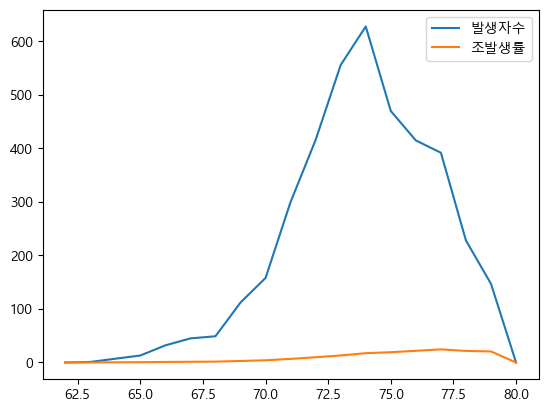

In [68]:
df2.plot()
plt.show()

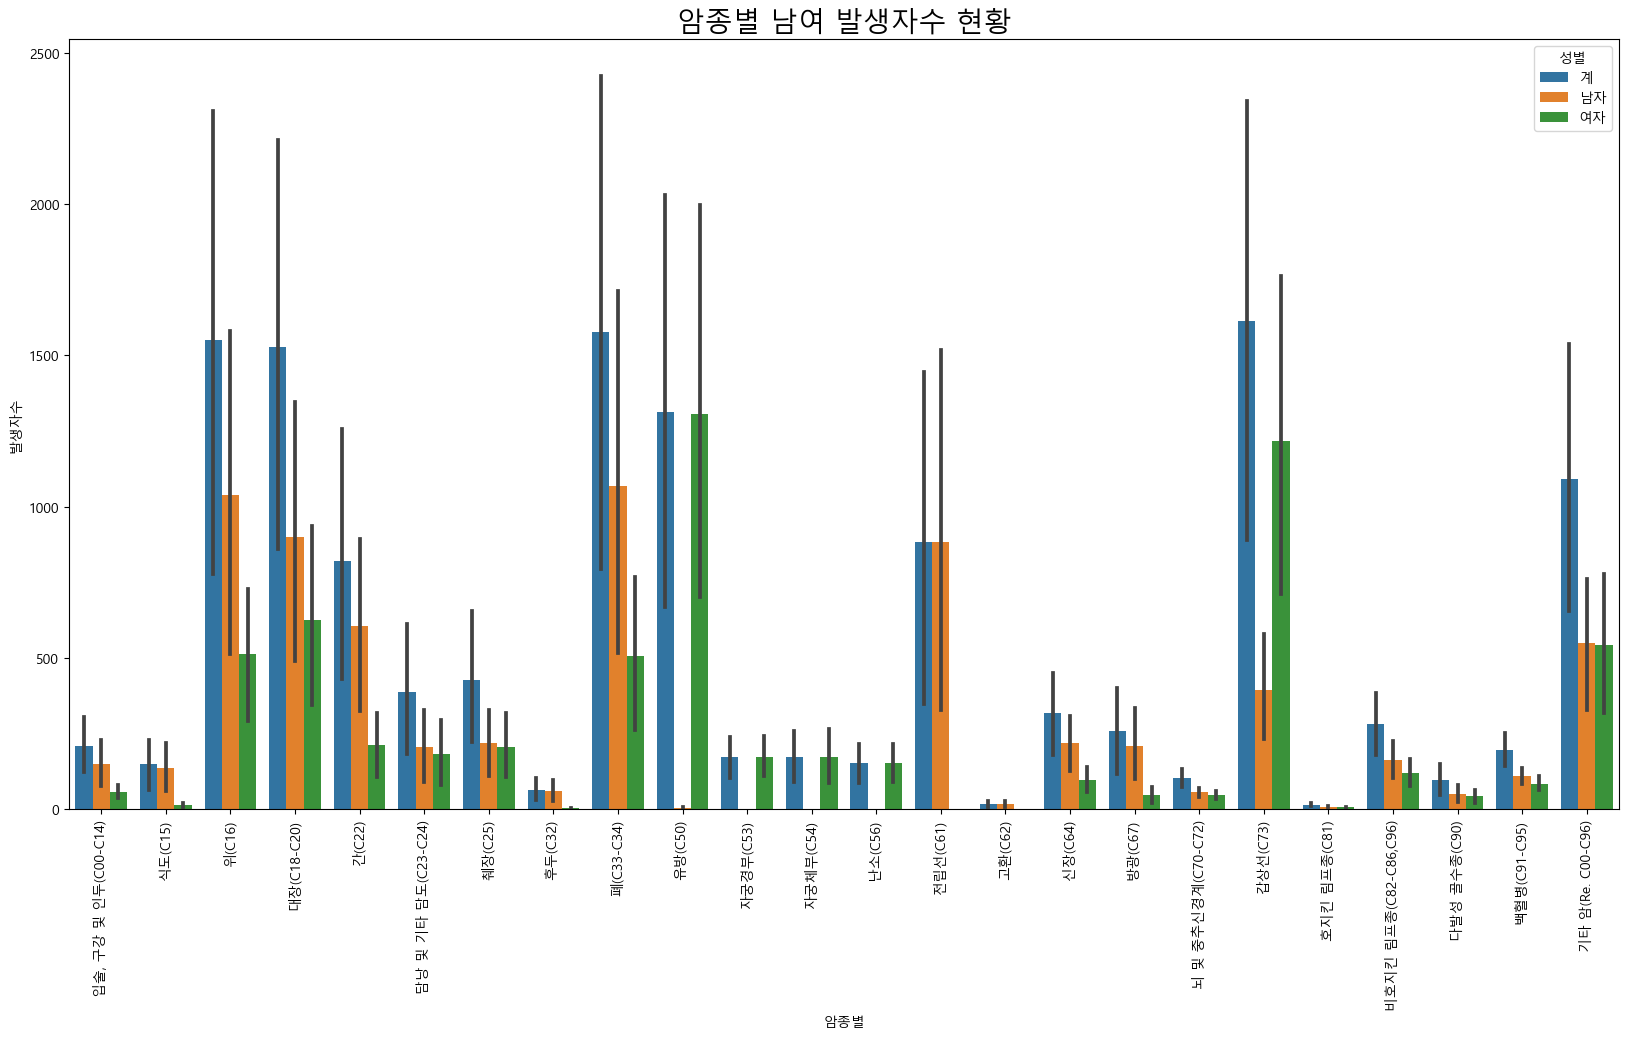

In [72]:
plt.figure(figsize=(20, 10))
sns.barplot(x = '암종별', y = '발생자수', hue = '성별', data = df1)
plt.title('암종별 남여 발생자수 현황', fontsize=20)
plt.xticks(rotation=90)
plt.show()